# Expontential Weighted Moving Average

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
df =pd.read_csv('DailyDelhiClimateTest.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


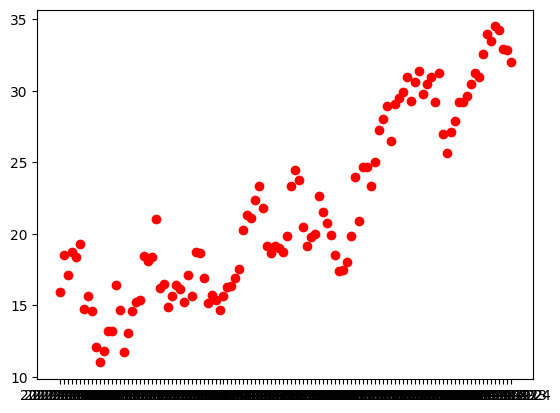

In [5]:
df = df[['date','meantemp']]
plt.scatter(df['date'],df['meantemp'],color ='red')

In [6]:
x1 = df['meantemp'].ewm(alpha=0.9).mean()

In [7]:
df['EWM'] =x1

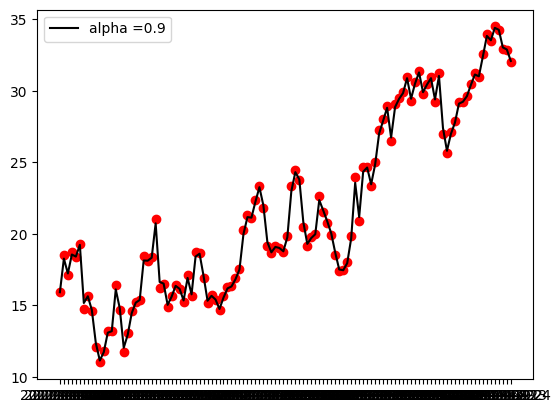

In [10]:
plt.scatter(df['date'],df['meantemp'],color ='red')
plt.plot(df['EWM'],color ='black' ,label = 'alpha =0.9')
plt.legend()
plt.show()

In [11]:
df.drop(columns=['EWM'],inplace=True)

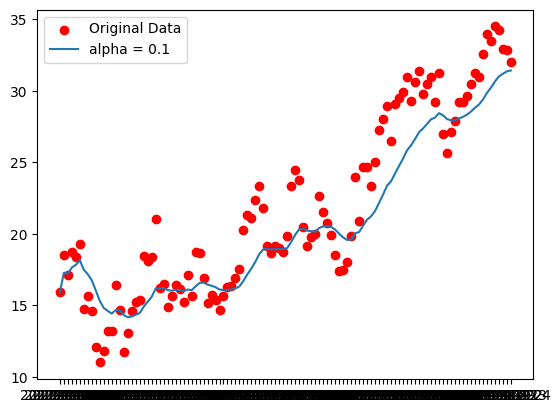

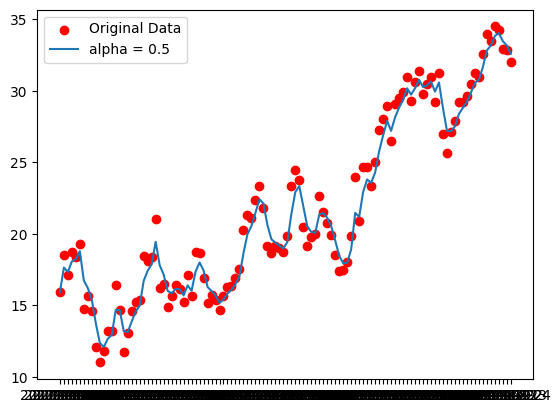

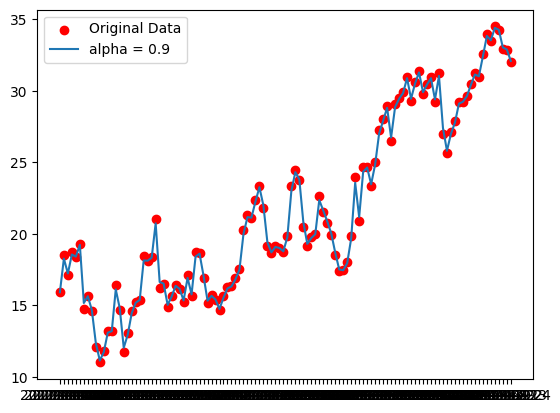

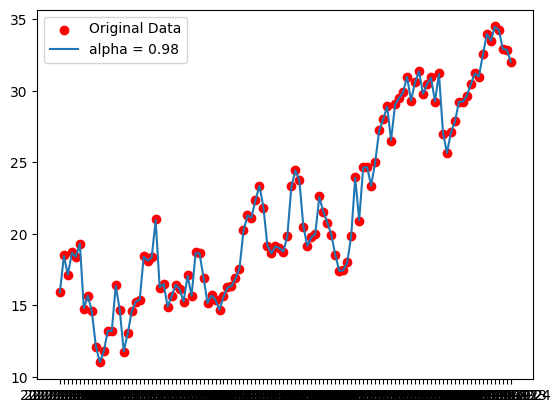

In [19]:
alpha = [0.1, 0.5, 0.9, 0.98]
ewm_names = [f'ewm({a})' for a in alpha]

# Apply EWMA and store results in the DataFrame
for a, name in zip(alpha, ewm_names):
    df[name] = df['meantemp'].ewm(alpha=a).mean()




# Plot EWMA for Different Alpha Values
for a, name in zip(alpha, ewm_names):
    # Plot Original Data
    plt.scatter(df['date'], df['meantemp'], color='red', label='Original Data')
    plt.plot(df['date'], df[name], label=f'alpha = {a}')

# Display Plot
    plt.legend()
    plt.show()